In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind


### Data Cleaning

In [3]:
df = pd.read_csv(r"C:\Users\OWNER\Downloads\merged.csv")

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
49731,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [8]:
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49730,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df_cleaned = df.drop_duplicates()


In [11]:
print(df_cleaned)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

### Demographic Analysis:

1. ##### What is the distribution of customers by age, job type, marital status, and education level?  


##### A. Age distribution of customers

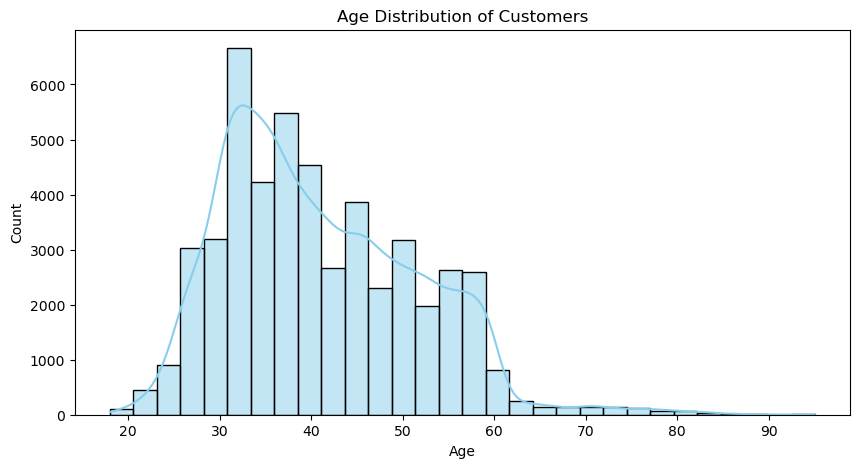

In [12]:
# 1. Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

##### B. Job Type Distribution of Customers

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\2735807889.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['job'], order=df['job'].value_counts().index, palette="coolwarm")


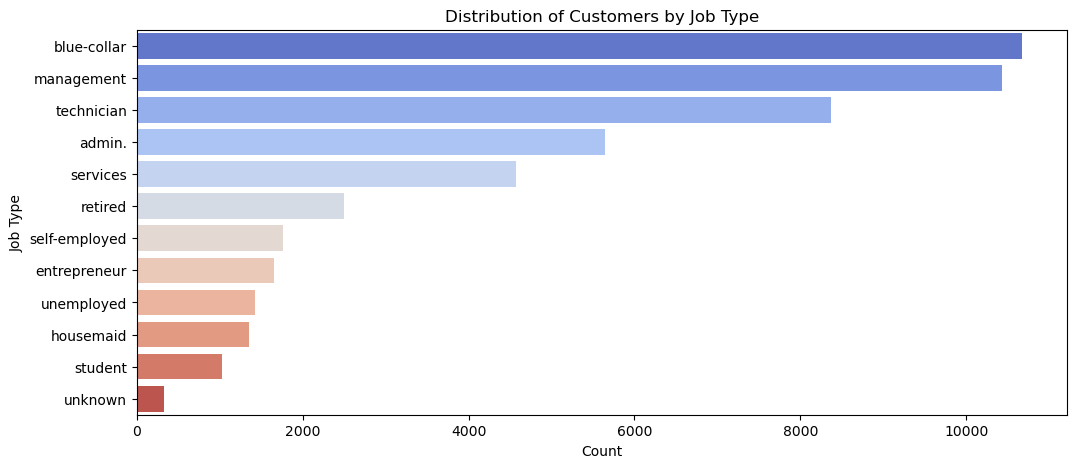

In [13]:
# 2. Job Type Distribution
plt.figure(figsize=(12, 5))
sns.countplot(y=df['job'], order=df['job'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Customers by Job Type")
plt.xlabel("Count")
plt.ylabel("Job Type")
plt.show()

 ##### C. Marital Status Distribution Of Customers

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\1294010856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['marital'], palette="Set2")


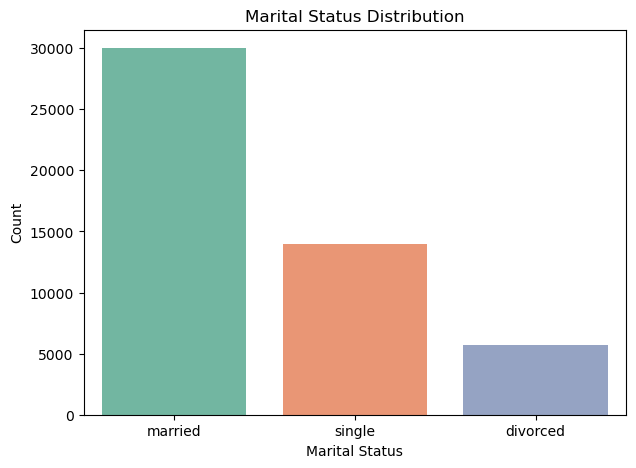

In [14]:
# 3. Marital Status Distribution
plt.figure(figsize=(7, 5))
sns.countplot(x=df['marital'], palette="Set2")
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()


##### D. Education Level Distribution Of Customers

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\3971663798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['education'], order=df['education'].value_counts().index, palette="pastel")


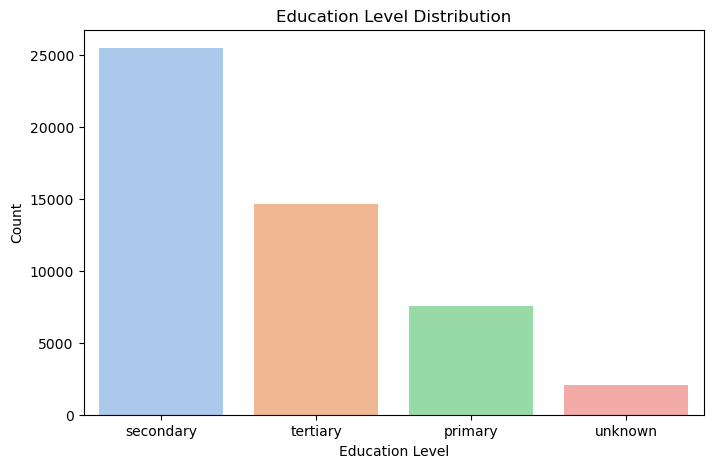

In [15]:
# 4. Education Level Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['education'], order=df['education'].value_counts().index, palette="pastel")
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

##### E. Subscription Rate by Age Of Customers

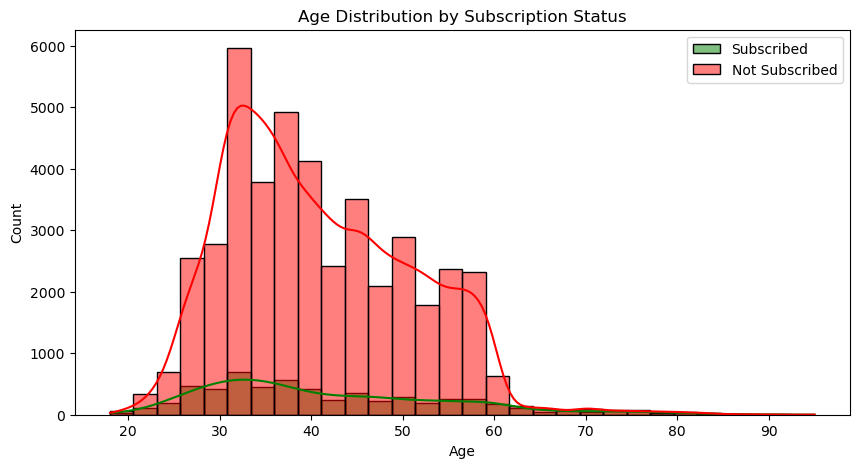

In [16]:
# 5. Subscription Rate by Age
plt.figure(figsize=(10, 5))
sns.histplot(df[df['y'] == 'yes']['age'], bins=30, kde=True, color="green", label="Subscribed")
sns.histplot(df[df['y'] == 'no']['age'], bins=30, kde=True, color="red", label="Not Subscribed", alpha=0.5)
plt.legend()
plt.title("Age Distribution by Subscription Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

##### F. Subscription Rate by Job Of Customers

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\191524788.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['job'], y=(df['y'] == 'yes').astype(int), order=df['job'].value_counts().index, palette="coolwarm")


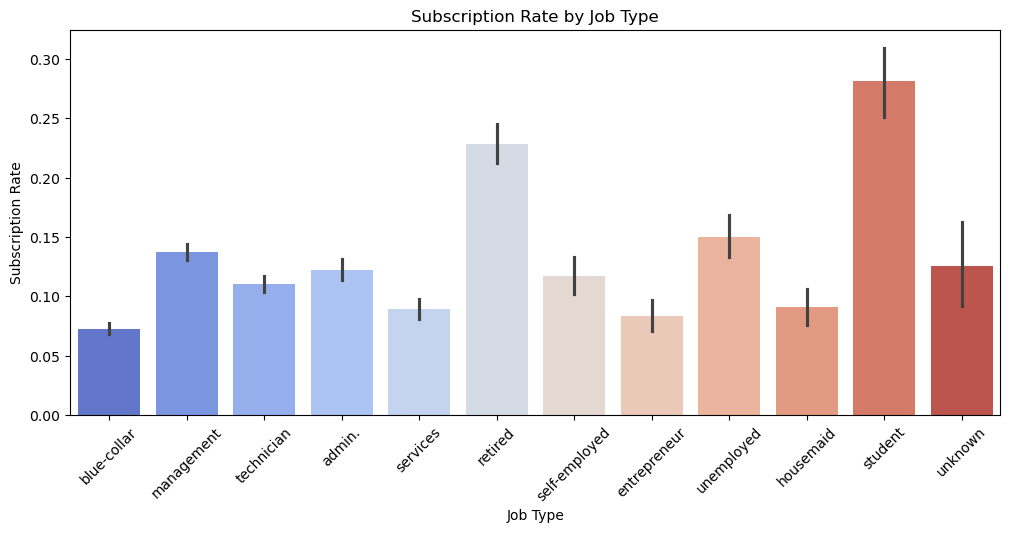

In [17]:
# 6. Subscription Rate by Job
plt.figure(figsize=(12, 5))
sns.barplot(x=df['job'], y=(df['y'] == 'yes').astype(int), order=df['job'].value_counts().index, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Subscription Rate by Job Type")
plt.xlabel("Job Type")
plt.ylabel("Subscription Rate")
plt.show()


### Financial Profile Analysis:  

##### A. What is the distribution of customers based on their average yearly balance (`balance`)?  

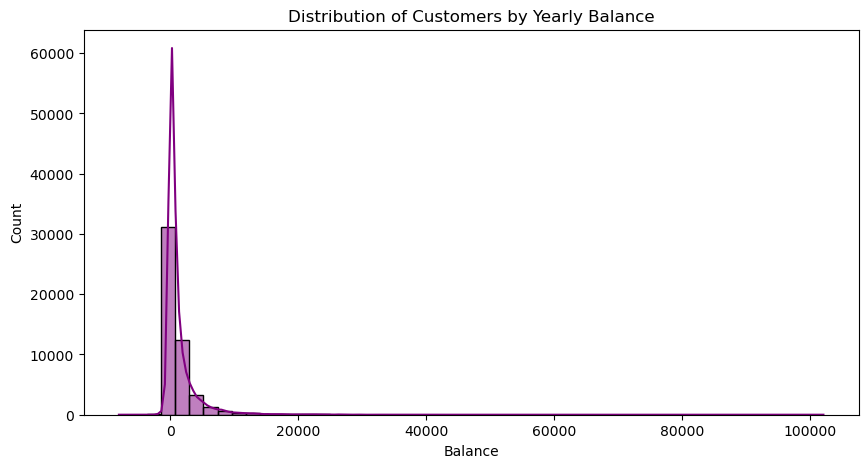

In [18]:
# Balance Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['balance'], bins=50, kde=True, color="purple")
plt.title("Distribution of Customers by Yearly Balance")
plt.xlabel("Balance")
plt.ylabel("Count")
plt.show()

In [19]:
print("Balance distribution analysis complete!")

Balance distribution analysis complete!


##### B. Do customers with housing loans or personal loans behave differently in terms of subscribing to the product? 

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\2194035920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['housing'], y=(df['y'] == 'yes').astype(int), palette="coolwarm")


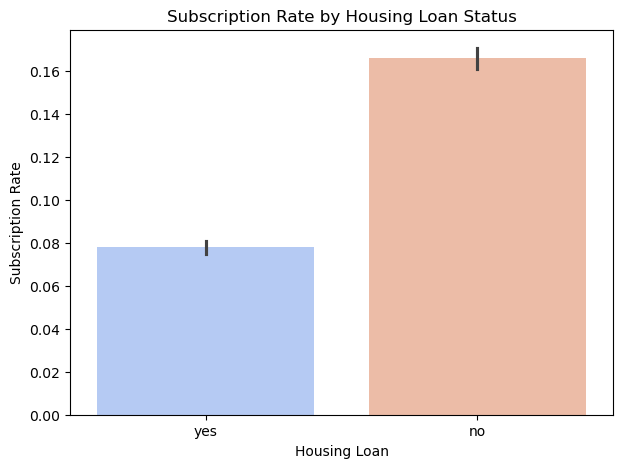

In [20]:
# Subscription Rate by Housing Loan
plt.figure(figsize=(7, 5))
sns.barplot(x=df['housing'], y=(df['y'] == 'yes').astype(int), palette="coolwarm")
plt.title("Subscription Rate by Housing Loan Status")
plt.xlabel("Housing Loan")
plt.ylabel("Subscription Rate")
plt.show()

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\1058468735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['loan'], y=(df['y'] == 'yes').astype(int), palette="coolwarm")


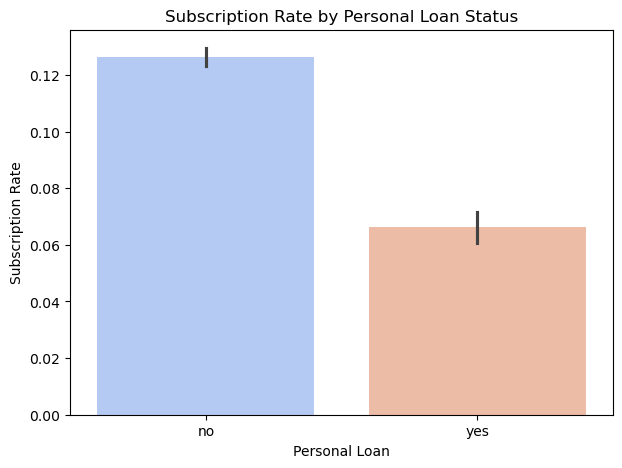

In [21]:
# Subscription Rate by Personal Loan
plt.figure(figsize=(7, 5))
sns.barplot(x=df['loan'], y=(df['y'] == 'yes').astype(int), palette="coolwarm")
plt.title("Subscription Rate by Personal Loan Status")
plt.xlabel("Personal Loan")
plt.ylabel("Subscription Rate")
plt.show()


In [22]:
print("Loan subscription analysis complete!")

Loan subscription analysis complete!


##### C. Is there a relationship between having credit in default (`default`) and customer behavior?  

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\2075075074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['default'], y=(df['y'] == 'yes').astype(int), palette="coolwarm")


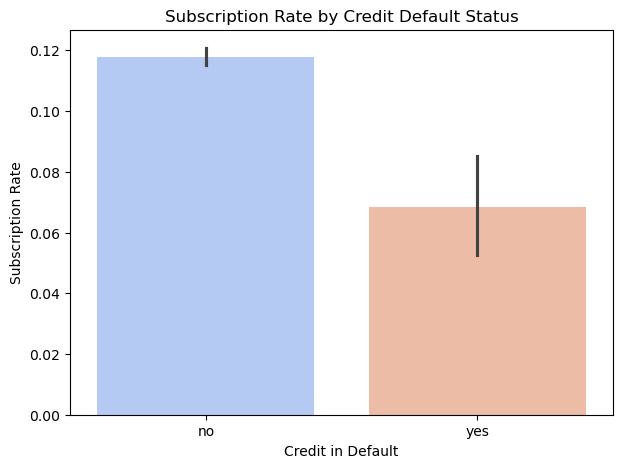

In [23]:
# Subscription Rate by Credit Default
plt.figure(figsize=(7, 5))
sns.barplot(x=df['default'], y=(df['y'] == 'yes').astype(int), palette="coolwarm")
plt.title("Subscription Rate by Credit Default Status")
plt.xlabel("Credit in Default")
plt.ylabel("Subscription Rate")
plt.show()


In [24]:
# Chi-Square Test: Does 'default' significantly impact subscription behavior?
contingency_table = pd.crosstab(df['default'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency_table)


In [25]:
# Print statistical results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

Chi-Square Test Results:
Chi2 Statistic: 20.0931
P-value: 0.0000


In [26]:
# Interpretation of the p-value
if p < 0.05:
    print("Conclusion: There is a statistically significant relationship between credit default status and subscription behavior.")
else:
    print("Conclusion: No significant relationship found between credit default status and subscription behavior.")


Conclusion: There is a statistically significant relationship between credit default status and subscription behavior.


### 3. Campaign Interaction Analysis:  

##### A. How does the duration of the last contact (`duration`) influence customer behavior?  

In [27]:
# Convert 'y' to binary (0 = no, 1 = yes) for analysis
df['subscribed'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [28]:
# Set visualization style
sns.set_style("whitegrid")

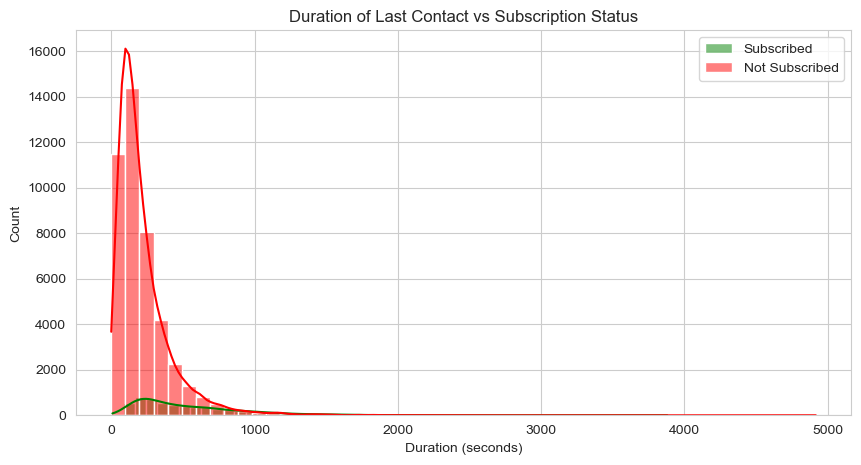

In [29]:
# 1. Distribution of Duration by Subscription Status
plt.figure(figsize=(10, 5))
sns.histplot(df[df['subscribed'] == 1]['duration'], bins=50, kde=True, color="green", label="Subscribed")
sns.histplot(df[df['subscribed'] == 0]['duration'], bins=50, kde=True, color="red", label="Not Subscribed", alpha=0.5)
plt.legend()
plt.title("Duration of Last Contact vs Subscription Status")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.show()

In [30]:
# 2. Summary Statistics
subscribed_duration = df[df['subscribed'] == 1]['duration']
not_subscribed_duration = df[df['subscribed'] == 0]['duration']

In [31]:
print("Summary Statistics:")
print(f"Mean Duration (Subscribed): {subscribed_duration.mean():.2f} sec")
print(f"Mean Duration (Not Subscribed): {not_subscribed_duration.mean():.2f} sec")


Summary Statistics:
Mean Duration (Subscribed): 538.68 sec
Mean Duration (Not Subscribed): 221.65 sec


In [32]:
# 3. T-Test to Check Statistical Significance
t_stat, p_value = ttest_ind(subscribed_duration, not_subscribed_duration, equal_var=False)


In [33]:
print("\nT-Test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-Test Results:
T-statistic: 60.4842
P-value: 0.0000


In [34]:
# Interpretation of results
if p_value < 0.05:
    print("Conclusion: There is a statistically significant difference in call duration between subscribed and non-subscribed customers.")
else:
    print("Conclusion: No significant difference in call duration between subscribed and non-subscribed customers.")

Conclusion: There is a statistically significant difference in call duration between subscribed and non-subscribed customers.


##### B. Are there specific months or days of the month when customers are more likely to subscribe?  

In [35]:
# Ensure 'month' and 'day' columns exist in the dataset
if 'month' not in df.columns or 'day' not in df.columns:
    print("Error: The dataset must contain 'month' and 'day' columns.")
else:
    # Convert 'y' to binary (0 = no, 1 = yes) for analysis
    df['subscribed'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\3639133064.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['month'], y=df['subscribed'], order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette="coolwarm")


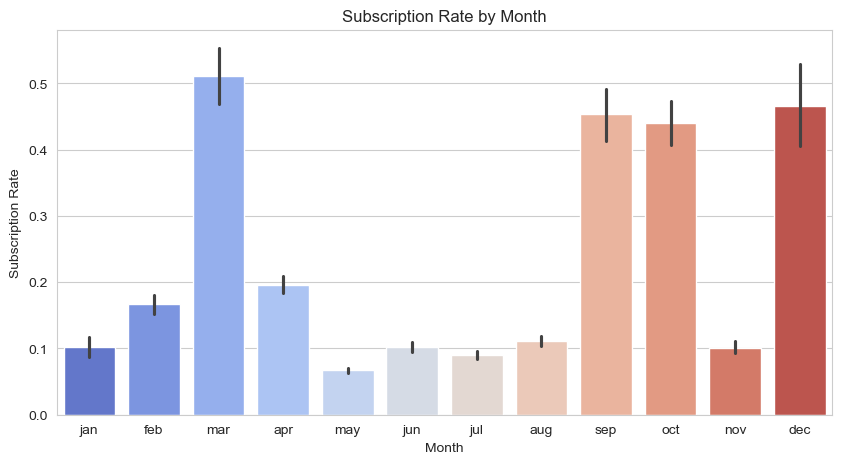

In [36]:
 # 1. Subscription Rate by Month 
 plt.figure(figsize=(10, 5))
 sns.barplot(x=df['month'], y=df['subscribed'], order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette="coolwarm")
 plt.title("Subscription Rate by Month")
 plt.xlabel("Month")
 plt.ylabel("Subscription Rate")
 plt.show()


C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\2808374961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['day'], y=df['subscribed'], palette="coolwarm")


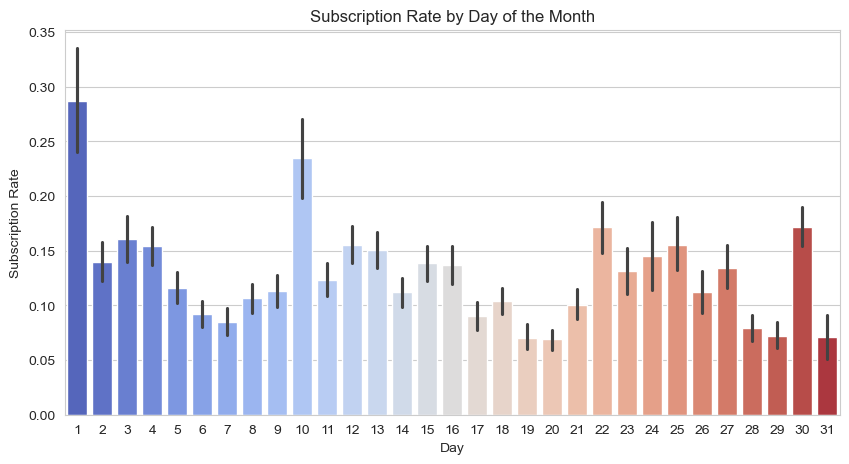

In [37]:
# 2. Subscription Rate by Day of the Month
plt.figure(figsize=(10, 5))
sns.barplot(x=df['day'], y=df['subscribed'], palette="coolwarm")
plt.title("Subscription Rate by Day of the Month")
plt.xlabel("Day")
plt.ylabel("Subscription Rate")
plt.show()

In [38]:
print("Time-based subscription analysis complete!")

Time-based subscription analysis complete!


##### C. What is the average number of contacts (`campaign`) made per customer, and does it vary by demographic or financial profile?  

In [39]:
# 1. Overall Average Contacts Per Customer
avg_contacts = df['campaign'].mean()
print(f"Average Number of Contacts Per Customer: {avg_contacts:.2f}")


Average Number of Contacts Per Customer: 2.77


##### 2. Average Contacts by Demographics

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\909656627.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['job'], y=df['campaign'], palette="coolwarm")


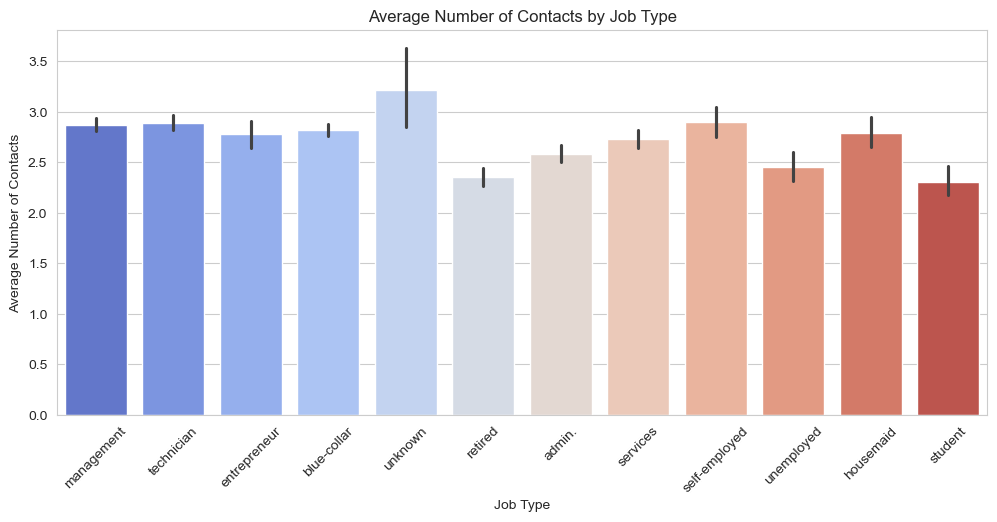

In [40]:
# By Job Type
plt.figure(figsize=(12, 5))
sns.barplot(x=df['job'], y=df['campaign'], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Average Number of Contacts by Job Type")
plt.xlabel("Job Type")
plt.ylabel("Average Number of Contacts")
plt.show()

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\2900633292.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['marital'], y=df['campaign'], palette="coolwarm")


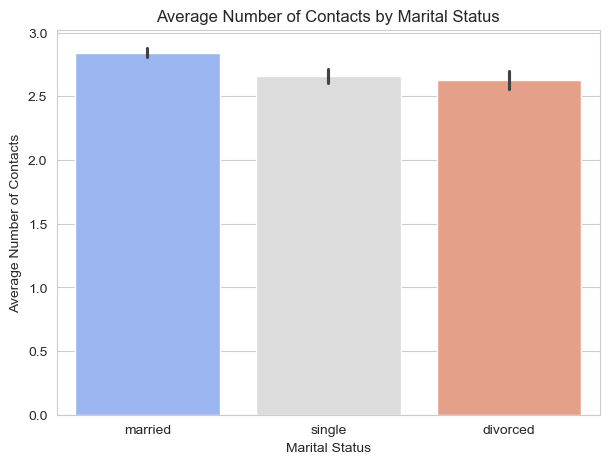

In [41]:
# By Marital Status
plt.figure(figsize=(7, 5))
sns.barplot(x=df['marital'], y=df['campaign'], palette="coolwarm")
plt.title("Average Number of Contacts by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Average Number of Contacts")
plt.show()


C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\2636993892.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['education'], y=df['campaign'], palette="coolwarm")


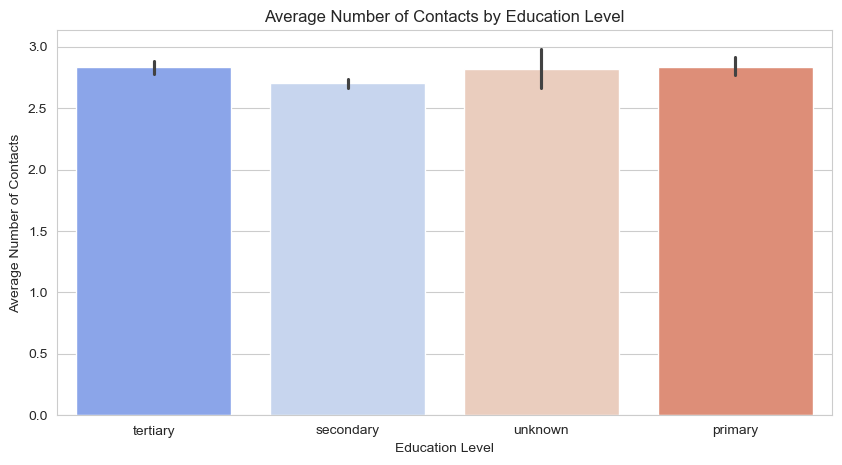

In [42]:
# By Education Level
plt.figure(figsize=(10, 5))
sns.barplot(x=df['education'], y=df['campaign'], palette="coolwarm")
plt.title("Average Number of Contacts by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Number of Contacts")
plt.show()

##### 3. Average Contacts by Financial Profile

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\4140379443.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['y'], y=df['campaign'], palette="coolwarm")


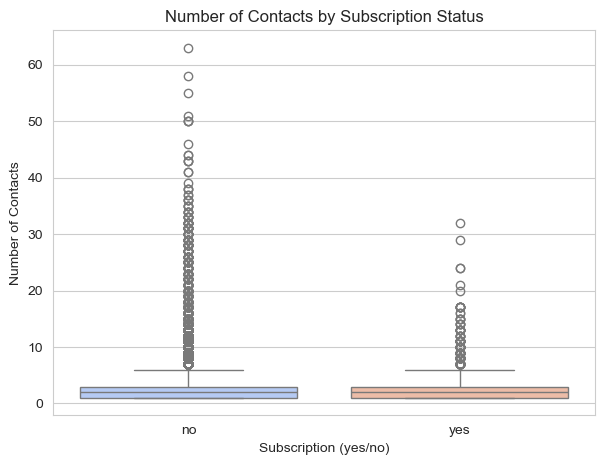

In [43]:
# By Account Balance
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['y'], y=df['campaign'], palette="coolwarm")
plt.title("Number of Contacts by Subscription Status")
plt.xlabel("Subscription (yes/no)")
plt.ylabel("Number of Contacts")
plt.show()

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\3143157722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['housing'], y=df['campaign'], palette="coolwarm")


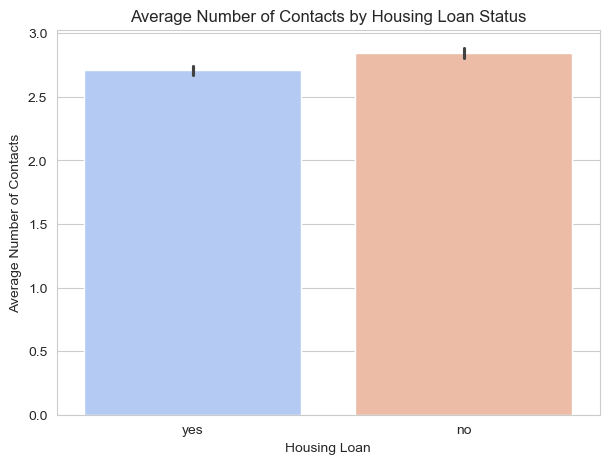

In [44]:
# By Housing Loan Status
plt.figure(figsize=(7, 5))
sns.barplot(x=df['housing'], y=df['campaign'], palette="coolwarm")
plt.title("Average Number of Contacts by Housing Loan Status")
plt.xlabel("Housing Loan")
plt.ylabel("Average Number of Contacts")
plt.show()

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\1349265647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['loan'], y=df['campaign'], palette="coolwarm")


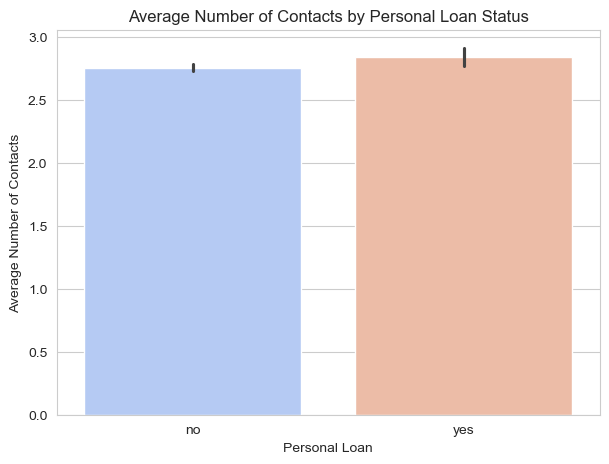

In [45]:
# By Personal Loan Status
plt.figure(figsize=(7, 5))
sns.barplot(x=df['loan'], y=df['campaign'], palette="coolwarm")
plt.title("Average Number of Contacts by Personal Loan Status")
plt.xlabel("Personal Loan")
plt.ylabel("Average Number of Contacts")
plt.show()

In [46]:
print("Campaign contact analysis complete!")

Campaign contact analysis complete!


### 4. Historical Campaign Analysis:  


##### A. How does the outcome of the previous marketing campaign (`poutcome`) influence the current campaign's results?  

In [47]:
# Convert 'y' to binary (0 = no, 1 = yes) for analysis
df['subscribed'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\723527471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['poutcome'], y=df['subscribed'], palette="coolwarm")


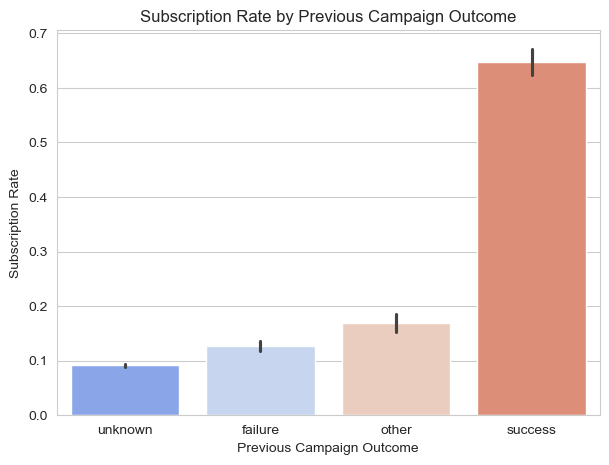

In [48]:
# 1. Subscription Rate by Previous Campaign Outcome
plt.figure(figsize=(7, 5))
sns.barplot(x=df['poutcome'], y=df['subscribed'], palette="coolwarm")
plt.title("Subscription Rate by Previous Campaign Outcome")
plt.xlabel("Previous Campaign Outcome")
plt.ylabel("Subscription Rate")
plt.show()

In [49]:
# 2. Chi-Square Test: Does 'poutcome' significantly impact current subscriptions?
contingency_table = pd.crosstab(df['poutcome'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [50]:
# Print statistical results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

Chi-Square Test Results:
Chi2 Statistic: 4777.8830
P-value: 0.0000


In [51]:
# Interpretation of results
if p < 0.05:
    print("Conclusion: The outcome of the previous campaign has a statistically significant impact on the current subscription rate.")
else:
    print("Conclusion: No significant relationship found between previous campaign outcome and current subscriptions.")

Conclusion: The outcome of the previous campaign has a statistically significant impact on the current subscription rate.


##### B. What percentage of customers were contacted before this campaign (`previous`), and how does it affect their likelihood of subscribing?  

In [52]:
# Convert 'y' to binary (0 = no, 1 = yes) for analysis
df['subscribed'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)


In [53]:
# 1. Percentage of Customers Contacted Before
contacted_before = df[df['previous'] > 0].shape[0]
total_customers = df.shape[0]
percentage_contacted = (contacted_before / total_customers) * 100

In [54]:
print(f"Percentage of customers contacted before this campaign: {percentage_contacted:.2f}%")


Percentage of customers contacted before this campaign: 18.24%


In [55]:
# 2. Subscription Rate Based on Previous Contacts
df['previous_contacted'] = df['previous'].apply(lambda x: 'Yes' if x > 0 else 'No')

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\223424680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['previous_contacted'], y=df['subscribed'], palette="coolwarm")


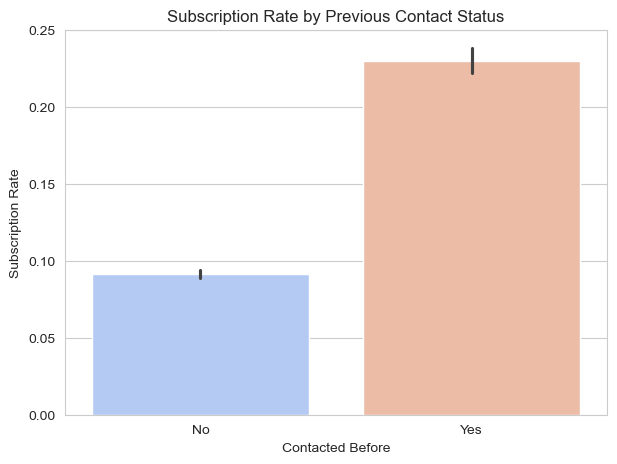

In [56]:
plt.figure(figsize=(7, 5))
sns.barplot(x=df['previous_contacted'], y=df['subscribed'], palette="coolwarm")
plt.title("Subscription Rate by Previous Contact Status")
plt.xlabel("Contacted Before")
plt.ylabel("Subscription Rate")
plt.show()

In [57]:
# 3. Chi-Square Test: Does 'previous' significantly impact subscriptions?
contingency_table = pd.crosstab(df['previous_contacted'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [58]:
# Print statistical results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

Chi-Square Test Results:
Chi2 Statistic: 1382.2319
P-value: 0.0000


In [59]:
# Interpretation of results
if p < 0.05:
    print("Conclusion: Being contacted before has a statistically significant impact on the likelihood of subscription.")
else:
    print("Conclusion: No significant relationship found between previous contacts and subscriptions.")

Conclusion: Being contacted before has a statistically significant impact on the likelihood of subscription.


### 5. Behavioral Insights:  
##### A. Are there patterns in customer behavior based on their interaction history (e.g., `pdays`, `previous`)?  

In [60]:
# Convert 'y' to binary (0 = no, 1 = yes) for analysis
df['subscribed'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

##### a. ANALYSIS OF `pdays` (Days Since Last Contact)

In [61]:
# Replace '999' in `pdays` with NaN (999 means no previous contact)
df['pdays'] = df['pdays'].replace(999, None)

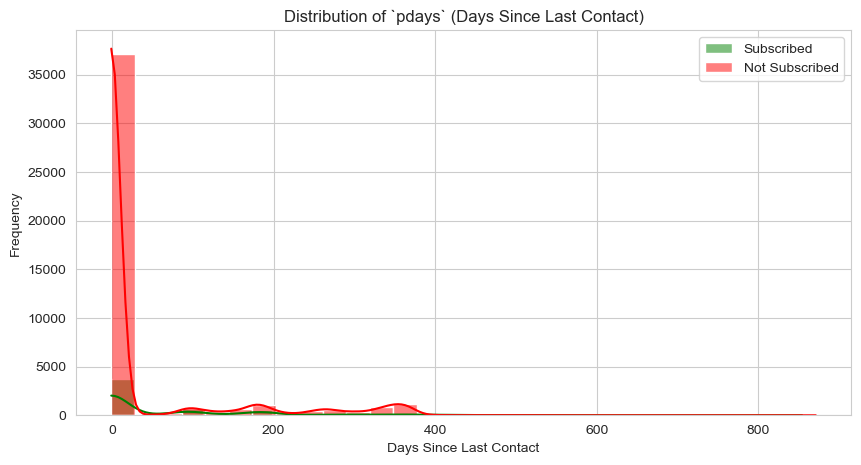

In [62]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['subscribed'] == 1]['pdays'], bins=30, kde=True, color="green", label="Subscribed")
sns.histplot(df[df['subscribed'] == 0]['pdays'], bins=30, kde=True, color="red", label="Not Subscribed")
plt.title("Distribution of `pdays` (Days Since Last Contact)")
plt.xlabel("Days Since Last Contact")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [63]:
from scipy.stats import f_oneway

In [64]:
# ANOVA Test: Does `pdays` significantly impact subscription?
subscribed_pdays = df[df['subscribed'] == 1]['pdays'].dropna()
not_subscribed_pdays = df[df['subscribed'] == 0]['pdays'].dropna()
anova_pdays = f_oneway(subscribed_pdays, not_subscribed_pdays)

In [65]:
print("ANOVA Test for `pdays`:")
print(f"F-Statistic: {anova_pdays.statistic:.4f}")
print(f"P-value: {anova_pdays.pvalue:.4f}")


ANOVA Test for `pdays`:
F-Statistic: 540.2266
P-value: 0.0000


In [66]:
if anova_pdays.pvalue < 0.05:
    print("Conclusion: `pdays` significantly affects subscription likelihood.")
else:
    print("Conclusion: No significant relationship found between `pdays` and subscription.")

Conclusion: `pdays` significantly affects subscription likelihood.


##### b. ANALYSIS OF `previous` (Number of Past Contacts)

In [67]:
# Categorizing `previous` into groups
df['previous_group'] = df['previous'].apply(lambda x: 'None' if x == 0 else '1-2' if x <= 2 else '3+')

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\2862831974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['previous_group'], y=df['subscribed'], palette="coolwarm")


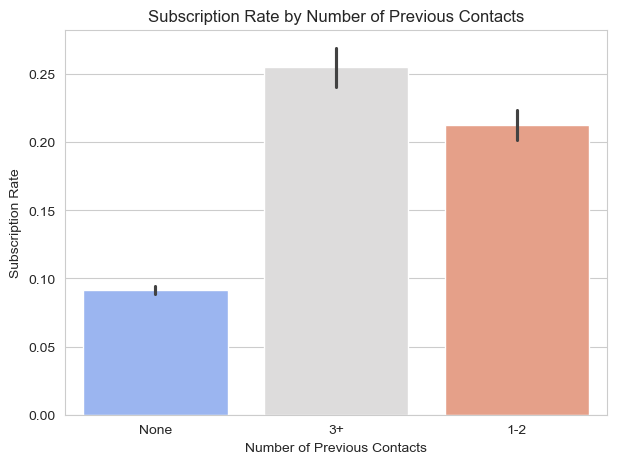

In [68]:
plt.figure(figsize=(7, 5))
sns.barplot(x=df['previous_group'], y=df['subscribed'], palette="coolwarm")
plt.title("Subscription Rate by Number of Previous Contacts")
plt.xlabel("Number of Previous Contacts")
plt.ylabel("Subscription Rate")
plt.show()

In [69]:
# Chi-Square Test: Does `previous` significantly impact subscriptions?
contingency_table = pd.crosstab(df['previous_group'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [70]:
print("\nChi-Square Test for `previous`:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")


Chi-Square Test for `previous`:
Chi2 Statistic: 1422.1239
P-value: 0.0000


In [71]:
if p < 0.05:
    print("Conclusion: `previous` significantly impacts the likelihood of subscription.")
else:
    print("Conclusion: No significant relationship found between `previous` and subscription.")


Conclusion: `previous` significantly impacts the likelihood of subscription.


#### B. Do customers with certain financial profiles (e.g., high balance, no loans) respond differently to the campaign?  

In [72]:
# Convert 'y' to binary (0 = no, 1 = yes) for analysis
df['subscribed'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

##### a. BALANCE VS. SUBSCRIPTION RATE


In [73]:
# Categorizing balance into groups
df['balance_category'] = pd.qcut(df['balance'], q=3, labels=["Low", "Medium", "High"])

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\3390901279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['balance_category'], y=df['subscribed'], palette="coolwarm")


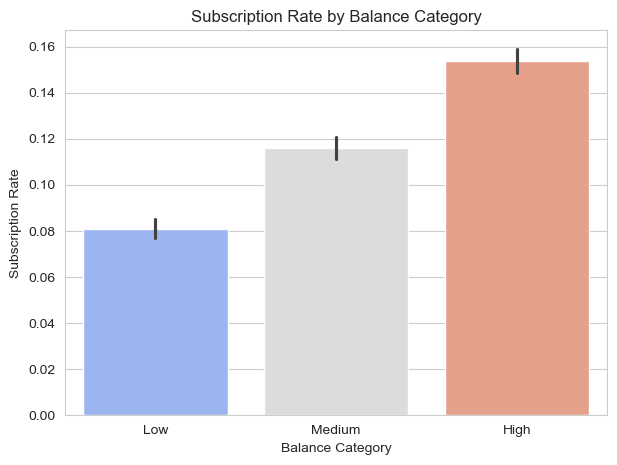

In [74]:
plt.figure(figsize=(7, 5))
sns.barplot(x=df['balance_category'], y=df['subscribed'], palette="coolwarm")
plt.title("Subscription Rate by Balance Category")
plt.xlabel("Balance Category")
plt.ylabel("Subscription Rate")
plt.show()

##### b. LOAN STATUS VS. SUBSCRIPTION RATE


In [75]:
# Grouping loan statuses
df['housing_loan'] = df['housing'].apply(lambda x: 'Yes' if x == 'yes' else 'No')
df['personal_loan'] = df['loan'].apply(lambda x: 'Yes' if x == 'yes' else 'No')

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\1359973051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['housing_loan'], y=df['subscribed'], palette="coolwarm")


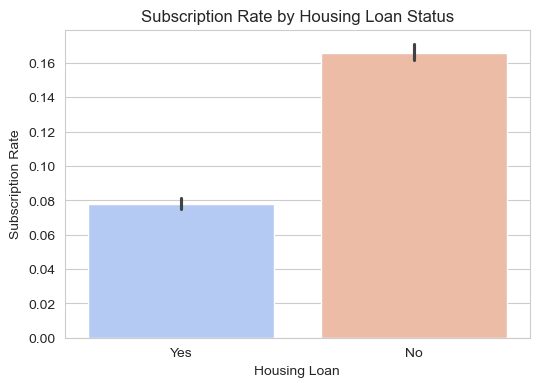

In [76]:
# Housing Loan Analysis
plt.figure(figsize=(6, 4))
sns.barplot(x=df['housing_loan'], y=df['subscribed'], palette="coolwarm")
plt.title("Subscription Rate by Housing Loan Status")
plt.xlabel("Housing Loan")
plt.ylabel("Subscription Rate")
plt.show()

C:\Users\OWNER\AppData\Local\Temp\ipykernel_6628\2647882292.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['personal_loan'], y=df['subscribed'], palette="coolwarm")


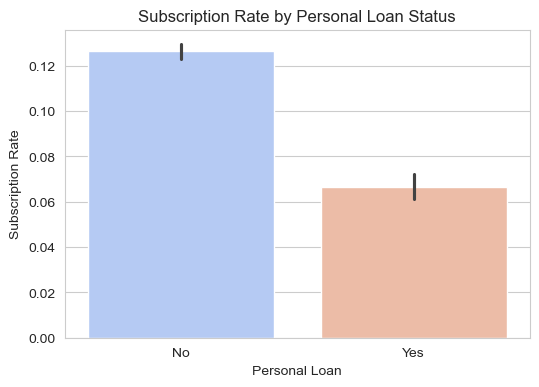

In [77]:
# Personal Loan Analysis
plt.figure(figsize=(6, 4))
sns.barplot(x=df['personal_loan'], y=df['subscribed'], palette="coolwarm")
plt.title("Subscription Rate by Personal Loan Status")
plt.xlabel("Personal Loan")
plt.ylabel("Subscription Rate")
plt.show()

##### c. CHI-SQUARE TESTS FOR LOANS

In [78]:
# Housing Loan Chi-Square Test
contingency_table_housing = pd.crosstab(df['housing_loan'], df['y'])
chi2_housing, p_housing, _, _ = chi2_contingency(contingency_table_housing)

In [79]:
print("\nChi-Square Test for Housing Loan and Subscription:")
print(f"Chi2 Statistic: {chi2_housing:.4f}")
print(f"P-value: {p_housing:.4f}")


Chi-Square Test for Housing Loan and Subscription:
Chi2 Statistic: 919.9330
P-value: 0.0000


In [80]:
if p_housing < 0.05:
    print("Conclusion: Housing loan status significantly affects subscription likelihood.")
else:
    print("Conclusion: No significant relationship found between housing loans and subscription.")

Conclusion: Housing loan status significantly affects subscription likelihood.


In [81]:
# Personal Loan Chi-Square Test
contingency_table_personal = pd.crosstab(df['personal_loan'], df['y'])
chi2_personal, p_personal, _, _ = chi2_contingency(contingency_table_personal)


In [82]:
print("\nChi-Square Test for Personal Loan and Subscription:")
print(f"Chi2 Statistic: {chi2_personal:.4f}")
print(f"P-value: {p_personal:.4f}")


Chi-Square Test for Personal Loan and Subscription:
Chi2 Statistic: 231.9666
P-value: 0.0000


In [83]:
if p_personal < 0.05:
    print("Conclusion: Personal loan status significantly affects subscription likelihood.")
else:
    print("Conclusion: No significant relationship found between personal loans and subscription.")

Conclusion: Personal loan status significantly affects subscription likelihood.
